**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

# What drives the price of a car?

![](/content/images/kurt.jpeg)

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### CRISP-DM Framework

<center>
    <img src = /content/images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

The dataset is from kaggle that contains information on approx. 4 million used cars.

1. Identify the factors that affect the price
2. Identify the factors valued by customers with a used car
3. Provide the recommendations to a used car dealership

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [233]:
#Importing all Libraries and packages needed for this application

#Basic python packages
import pandas as pd
import numpy as np
#For Plotting
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.express as px

#PCA and K-Means - Grouping and Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

#Pipeling and Modeling
from sklearn import set_config
from sklearn import svm
set_config(display="diagram")
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.inspection import permutation_importance

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statistics import pvariance
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from warnings import filterwarnings
filterwarnings('ignore')

In [234]:
#Read and save the used car vehicles CSV to a dataframe
vehicles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/vehicles.csv')

In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [236]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [237]:
#Since 'id' and 'VIN' are not going to help with determining the price of used car, it can be dropped
vehicles = vehicles.drop(['id','VIN'], axis=1)

In [238]:
vehicles.shape

(426880, 16)

##### Describe Data

Here is my understanding of the data description/ metadata of the attributes.

######  1. Vehicle Attributes
        - price: Min(0); Max(3736928711); Mean(75199.03); Median (13950.0); std(12182282.17)
        - manufacturer: [nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram', 'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick', 'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo', 'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini', 'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']        
        - model: [nan, 'sierra 1500 crew cab slt', 'silverado 1500', ..., 'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring']
        - condition: [nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage']
        - cylinders: [nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']
        - fuel: [nan, 'gas', 'other', 'diesel', 'hybrid', 'electric']
        - odometer: Min(0); Max(10000000.0); Mean(98043.33); Median(85548.0); std(213881.50)
        - title_status: [nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
        - transmission: [nan, 'other', 'automatic', 'manual']
        - drive: [nan, 'rwd', '4wd', 'fwd']
        - size: [nan, 'full-size', 'mid-size', 'compact', 'sub-compact']
        - type: [nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback', 'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible', 'wagon']
        - paint_color: [nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown', 'yellow', 'orange', 'green', 'custom', 'purple']
######    2. Contextual Attributes - time, location
        - region: Cities across United States of America
        - state: 51 states in United States of America   
        - year: [nan, 1900 to 2022]

In [239]:
vehicles.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


##### Explore Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a96627990>,
      dtype=object)

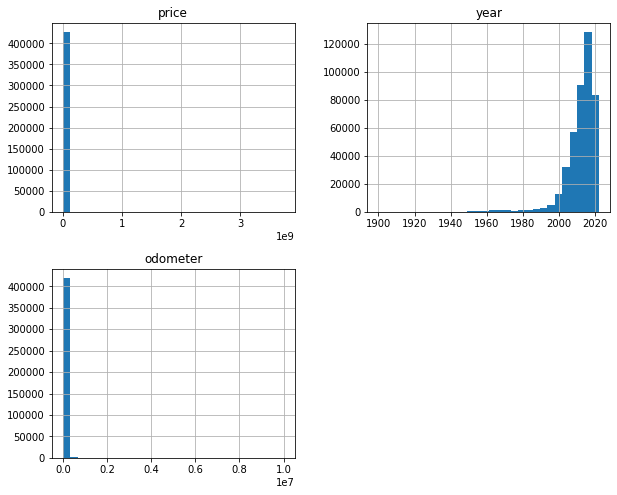

In [241]:
#Distribution graphs of the vehicles dataframe
vehicles.hist(bins=30, figsize=(10,8))

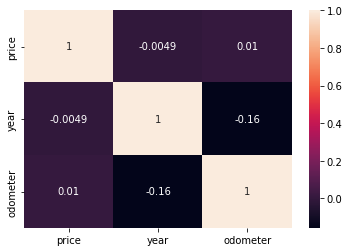

In [242]:
#Create Correlation Matrix to understand the correlation between numeric columns
sns.heatmap(vehicles.corr(), annot=True)

##### Verify Data Quality

In [243]:
#Checking null values per column in the DataFrame
vehicles.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [244]:
#Since price have big varience between min and max, removing outliers using IQR
first_quartile = vehicles['price'].quantile(.25)
third_quartile = vehicles['price'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_no_outlier = vehicles.loc[(vehicles['price']>lower) & (vehicles['price']<upper)]

In [245]:
#Since odometer have big varience between min and max, removing outliers using IQR
first_quartile = vehicles_no_outlier['odometer'].quantile(.25)
third_quartile = vehicles_no_outlier['odometer'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_no_outlier = vehicles_no_outlier.loc[(vehicles_no_outlier['odometer']>lower) & (vehicles_no_outlier['odometer']<upper)]

In [246]:
#Since year have big varience between min and max, removing outliers using IQR
first_quartile = vehicles_no_outlier['year'].quantile(.25)
third_quartile = vehicles_no_outlier['year'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
vehicles_no_outlier = vehicles_no_outlier.loc[(vehicles_no_outlier['year']>lower) & (vehicles_no_outlier['year']<upper)]

In [247]:
vehicles_no_outlier['cylinders'].unique()

array(['8 cylinders', '6 cylinders', nan, '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [248]:
#Removing sufix from 'cylinders' (categorical) to convert it to numerical value
vehicles_no_outlier['cylinders'] = vehicles_no_outlier['cylinders'].str.replace(r' cylinders','')
vehicles_no_outlier['cylinders'] = vehicles_no_outlier['cylinders'].str.replace(r'other','0')
vehicles_no_outlier[['cylinders']] = vehicles_no_outlier[['cylinders']].fillna('0')
vehicles_no_outlier.cylinders = vehicles_no_outlier.cylinders.astype(np.int64)
vehicles_no_outlier['cylinders'].value_counts()

0     165804
6      88964
4      74549
8      61399
5       1618
10      1330
3        552
12       109
Name: cylinders, dtype: int64

In [249]:
vehicles_no_outlier['transmission'].unique()

array(['other', 'automatic', 'manual', nan], dtype=object)

In [250]:
#Converting categorical column 'transmission' to numerical
vehicles_no_outlier['transmission'] = vehicles_no_outlier['transmission'].str.replace(r'other','0')
vehicles_no_outlier['transmission'] = vehicles_no_outlier['transmission'].str.replace(r'automatic','1')
vehicles_no_outlier['transmission'] = vehicles_no_outlier['transmission'].str.replace(r'manual','2')
vehicles_no_outlier[['transmission']] = vehicles_no_outlier[['transmission']].fillna('0')
vehicles_no_outlier.transmission = vehicles_no_outlier.transmission.astype(np.int64)
vehicles_no_outlier['transmission'].value_counts()

1    312896
0     63462
2     17967
Name: transmission, dtype: int64

In [251]:
vehicles_no_outlier['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [252]:
#Converting categorical column 'drive' to numerical
vehicles_no_outlier['drive'] = vehicles_no_outlier['drive'].str.replace(r'4wd','1')
vehicles_no_outlier['drive'] = vehicles_no_outlier['drive'].str.replace(r'fwd','1')
vehicles_no_outlier['drive'] = vehicles_no_outlier['drive'].str.replace(r'rwd','2')
vehicles_no_outlier[['drive']] = vehicles_no_outlier[['drive']].fillna('0')
vehicles_no_outlier.drive = vehicles_no_outlier.drive.astype(np.int64)
vehicles_no_outlier['drive'].value_counts()

1    224685
0    120066
2     49574
Name: drive, dtype: int64

In [253]:
#Converting DF columns to standard Dtypes
vehicles_no_outlier.convert_dtypes().dtypes 

region          string
price            Int64
year             Int64
manufacturer    string
model           string
condition       string
cylinders        Int64
fuel            string
odometer         Int64
title_status    string
transmission     Int64
drive            Int64
size            string
type            string
paint_color     string
state           string
dtype: object

In [254]:
vehicles_no_outlier.describe()

,price,year,cylinders,odometer,transmission,drive
count,394325.000000,394325.000000,394325.000000,394325.000000,394325.000000,394325.000000
mean,16606.272496,2012.605615,3.417298,91210.528589,0.884626,0.821234
std,13160.346587,5.417958,3.150628,60204.972677,0.439536,0.631068
min,0.000000,1995.000000,0.000000,0.000000,0.000000,0.000000
25%,5990.000000,2009.000000,0.000000,39182.000000,1.000000,0.000000
50%,13952.000000,2014.000000,4.000000,87000.000000,1.000000,1.000000
75%,25990.000000,2017.000000,6.000000,133439.000000,1.000000,1.000000
max,57341.000000,2022.000000,12.000000,277737.000000,2.000000,2.000000


##### Checking columns with NaN values and finding opportunities to fill with existing column values

In [255]:
vehicles_no_outlier['fuel'].unique()

array(['gas', 'other', 'diesel', 'hybrid', nan, 'electric'], dtype=object)

In [256]:
#Replace the 'NaN' values in fuel column with 'other'
vehicles_no_outlier[['fuel']] = vehicles_no_outlier[['fuel']].fillna('other')
vehicles_no_outlier['fuel'].value_counts()

gas         332202
other        31458
diesel       23974
hybrid        5089
electric      1602
Name: fuel, dtype: int64

In [257]:
vehicles_no_outlier['type'].unique()

array(['pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', nan, 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [258]:
#Replace the 'NaN' values in type column with 'other'
vehicles_no_outlier[['type']] = vehicles_no_outlier[['type']].fillna('other')
vehicles_no_outlier['type'].value_counts()

other          102880
sedan           83996
SUV             74336
pickup          39584
truck           31073
coupe           16253
hatchback       16242
wagon           10429
van              7955
convertible      6032
mini-van         4689
bus               442
offroad           414
Name: type, dtype: int64

In [259]:
vehicles_no_outlier['model'].unique()

array(['sierra 1500 crew cab slt', 'silverado 1500',
       'silverado 1500 crew', ..., '1500 z71', 'ATI', '96 Suburban'],
      dtype=object)

In [260]:
#Replace the 'NaN' values in model columns with 'Other'
vehicles_no_outlier[['model']] = vehicles_no_outlier[['model']].fillna('Other')
vehicles_no_outlier.loc[(vehicles_no_outlier.model=='♿'),'model'] = 'other'
vehicles_no_outlier['model'].value_counts()

f-150                        7560
silverado 1500               4936
1500                         4095
Other                        3675
camry                        3022
                             ... 
f-350 diesel 4x4 crew cab       1
f 150 4x4                       1
Escalade Premium                1
04 mb ml350                     1
96 Suburban                     1
Name: model, Length: 24677, dtype: int64

In [261]:
vehicles_no_outlier['title_status'].unique()

array(['clean', 'rebuilt', 'lien', nan, 'salvage', 'missing',
       'parts only'], dtype=object)

In [262]:
#Replace the 'NaN' values in title_status columns with 'missing'
vehicles_no_outlier[['title_status']] = vehicles_no_outlier[['title_status']].fillna('missing')
vehicles_no_outlier.loc[(vehicles_no_outlier.title_status=='other'), 'title_status'] = 'missing'
vehicles_no_outlier['title_status'].value_counts()

clean         374942
missing         7378
rebuilt         6945
salvage         3634
lien            1310
parts only       116
Name: title_status, dtype: int64

In [263]:
vehicles_no_outlier['paint_color'].unique()

array(['white', 'blue', 'red', 'black', 'silver', 'grey', nan, 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [264]:
#Replace the 'NaN' and 'custom' values in paint_color columns with 'other'
vehicles_no_outlier[['paint_color']] = vehicles_no_outlier[['paint_color']].fillna('other')
vehicles_no_outlier.loc[(vehicles_no_outlier.paint_color==('custom')) | (vehicles_no_outlier.paint_color==('missing')),'paint_color'] = 'other'
vehicles_no_outlier['paint_color'].value_counts()

other     124730
white      73654
black      59053
silver     41472
blue       28793
red        27370
grey       23136
green       6238
brown       6005
orange      1675
yellow      1642
purple       557
Name: paint_color, dtype: int64

##### Conditionally setting values for 'Condition' colummn based on 'Price' and 'Title'

In [265]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='salvage') &
                         ((vehicles_no_outlier.price>=0) & (vehicles_no_outlier.price<=500))), 'condition'] = 'salvage'

In [266]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         ((vehicles_no_outlier.price>=0)&(vehicles_no_outlier.price<=500))), 'condition'] = 'salvage'

In [267]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         ((vehicles_no_outlier.price>=501)&(vehicles_no_outlier.price<=2000))), 'condition'] = 'fair'

In [268]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         ((vehicles_no_outlier.price>=2001)&(vehicles_no_outlier.price<=13495))), 'condition'] = 'good'

In [269]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         ((vehicles_no_outlier.price>=13496)&(vehicles_no_outlier.price<=25000))), 'condition'] = 'excellent'

In [270]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         ((vehicles_no_outlier.price>=25001)&(vehicles_no_outlier.price<=40000))), 'condition'] = 'like new'

In [271]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.title_status=='missing') &
                         (vehicles_no_outlier.price>40000)), 'condition'] = 'new'

In [272]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & 
                         ((vehicles_no_outlier.price>=0)&(vehicles_no_outlier.price<=2000))), 'condition'] = 'salvage'

In [273]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & 
                         ((vehicles_no_outlier.price>=2001)&(vehicles_no_outlier.price<=5000))), 'condition'] = 'fair'

In [274]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & 
                         ((vehicles_no_outlier.price>=5001)&(vehicles_no_outlier.price<=13495))), 'condition'] = 'good'

In [275]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & 
                         ((vehicles_no_outlier.price>=13496)&(vehicles_no_outlier.price<=25000))), 'condition'] = 'excellent'

In [276]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & 
                         ((vehicles_no_outlier.price>=25001)&(vehicles_no_outlier.price<=40000))), 'condition'] = 'like new'

In [277]:
vehicles_no_outlier.loc[((vehicles_no_outlier.condition.isnull()) & (vehicles_no_outlier.price>40000)), 'condition'] = 'new'

In [278]:
vehicles_no_outlier.isnull().sum()

region               0
price                0
year                 0
manufacturer     12345
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size            284153
type                 0
paint_color          0
state                0
dtype: int64

In [502]:
vehicles_no_outlier.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [503]:
plot_data = vehicles_no_outlier.dropna()

Text(0.5, 1.0, 'Price of used cars over the years')

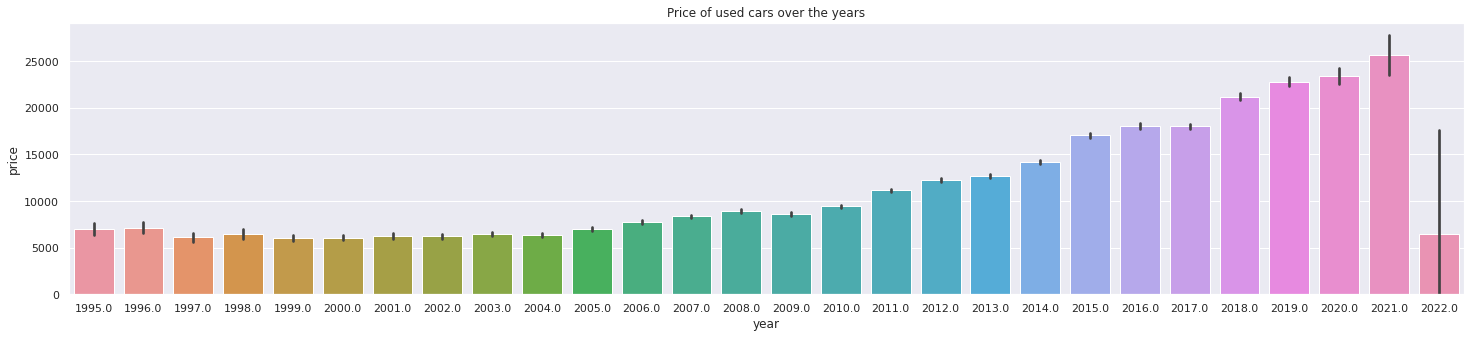

In [523]:
#Price of used cars over the years
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,5
sns.barplot(data=plot_data, x='year', y='price')
plt.title('Price of used cars over the years')

Text(0.5, 1.0, 'Used cars over the years')

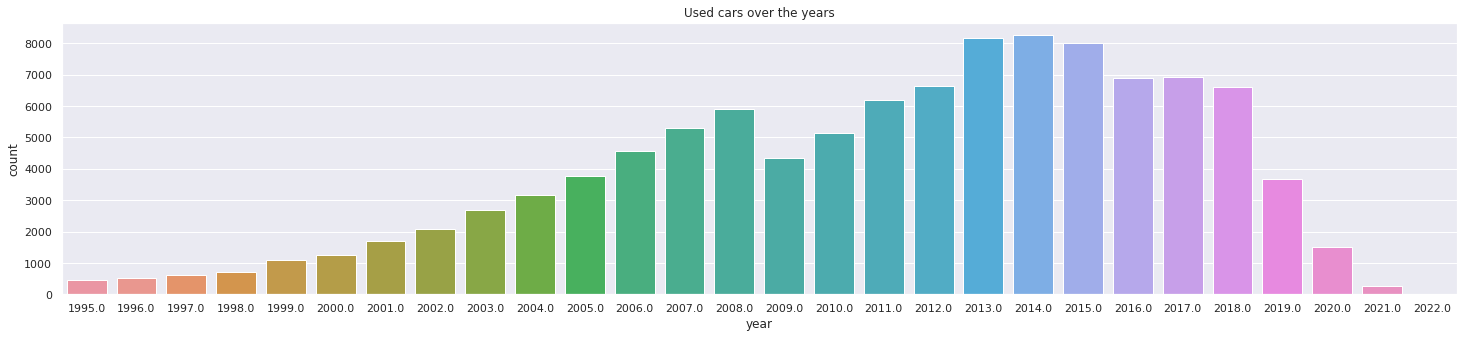

In [529]:
#Used cars over the years
rcParams['figure.figsize'] = 25,5
sns.countplot(data=plot_data, x='year')
plt.title('Used cars over the years')

Text(0.5, 1.0, 'Condition of used cars')

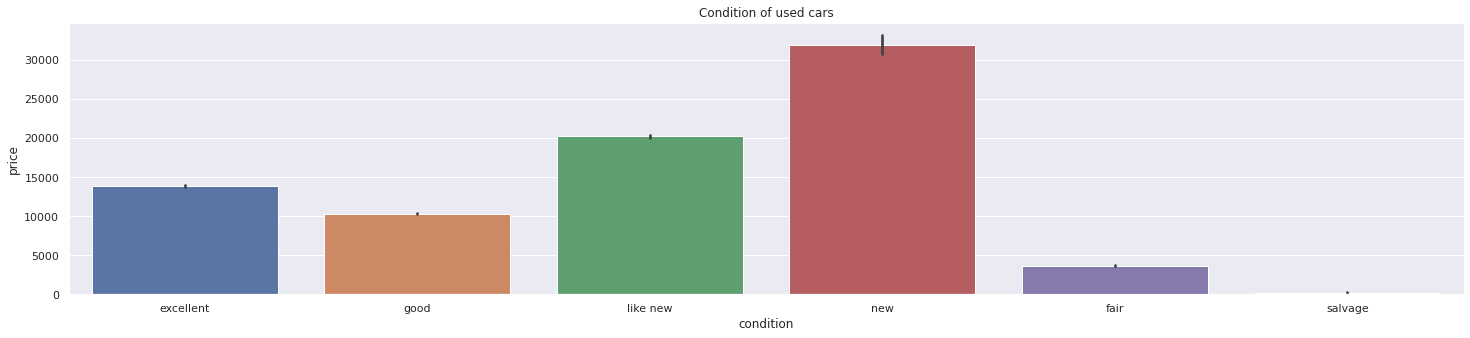

In [538]:
# Condition of used car and its influence on price
sns.barplot(data=plot_data, x='condition', y='price')
plt.title('Condition of used cars')

Text(0.5, 1.0, 'Condition and Title status of used car and Price')

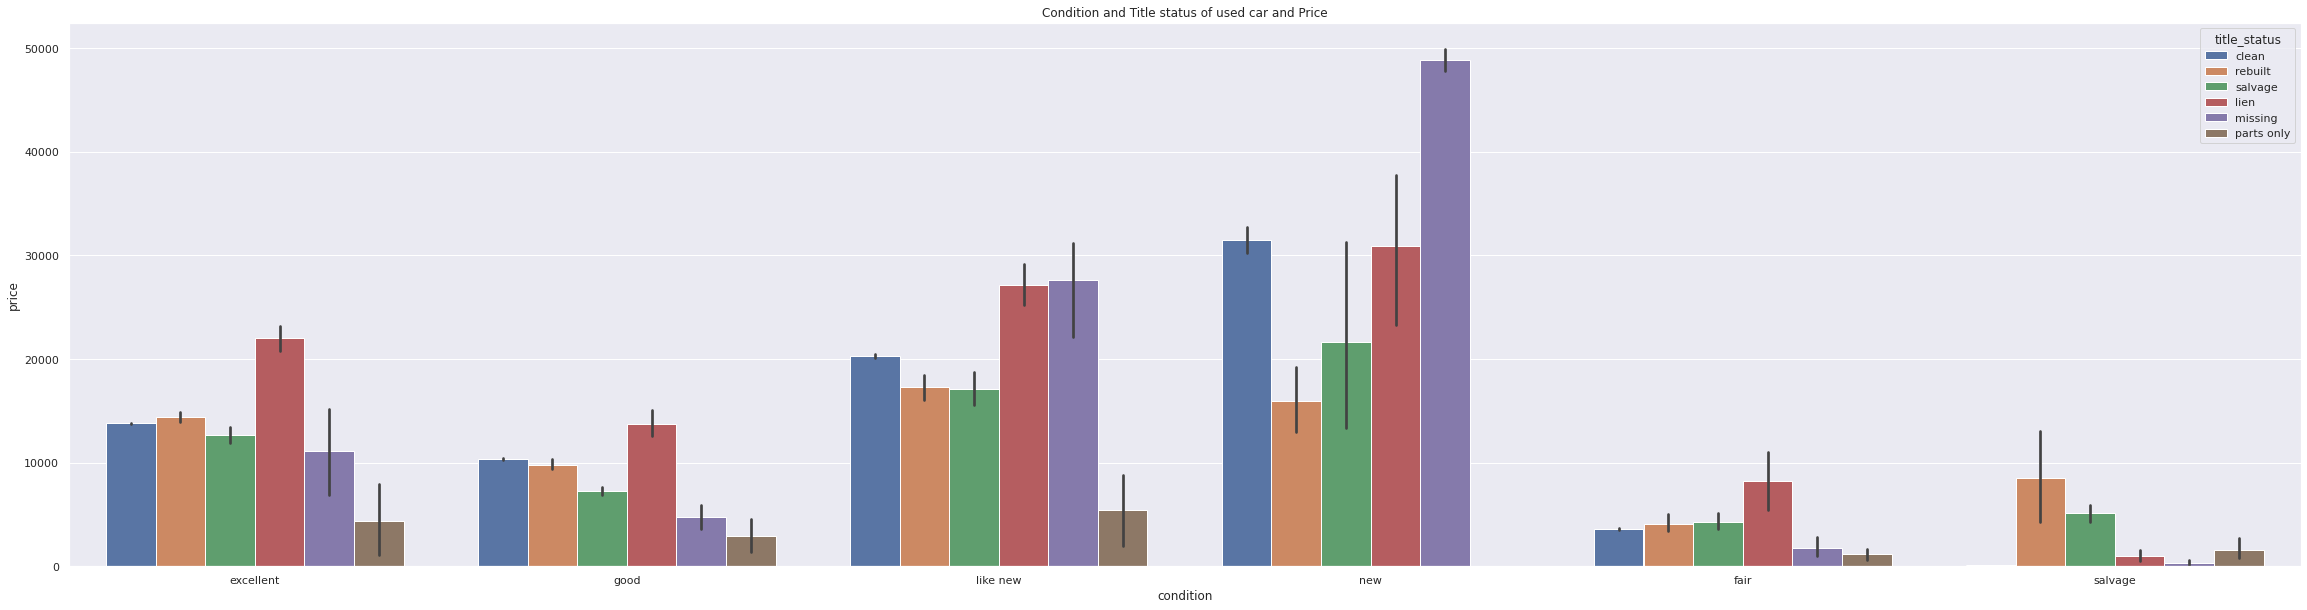

In [571]:
# Condition of used cars along with title and its influence on price
sns.barplot(data=plot_data, x='condition', y='price', hue='title_status')
plt.title('Condition and Title status of used car and Price')

Text(0.5, 1.0, 'Drive of used car and Price')

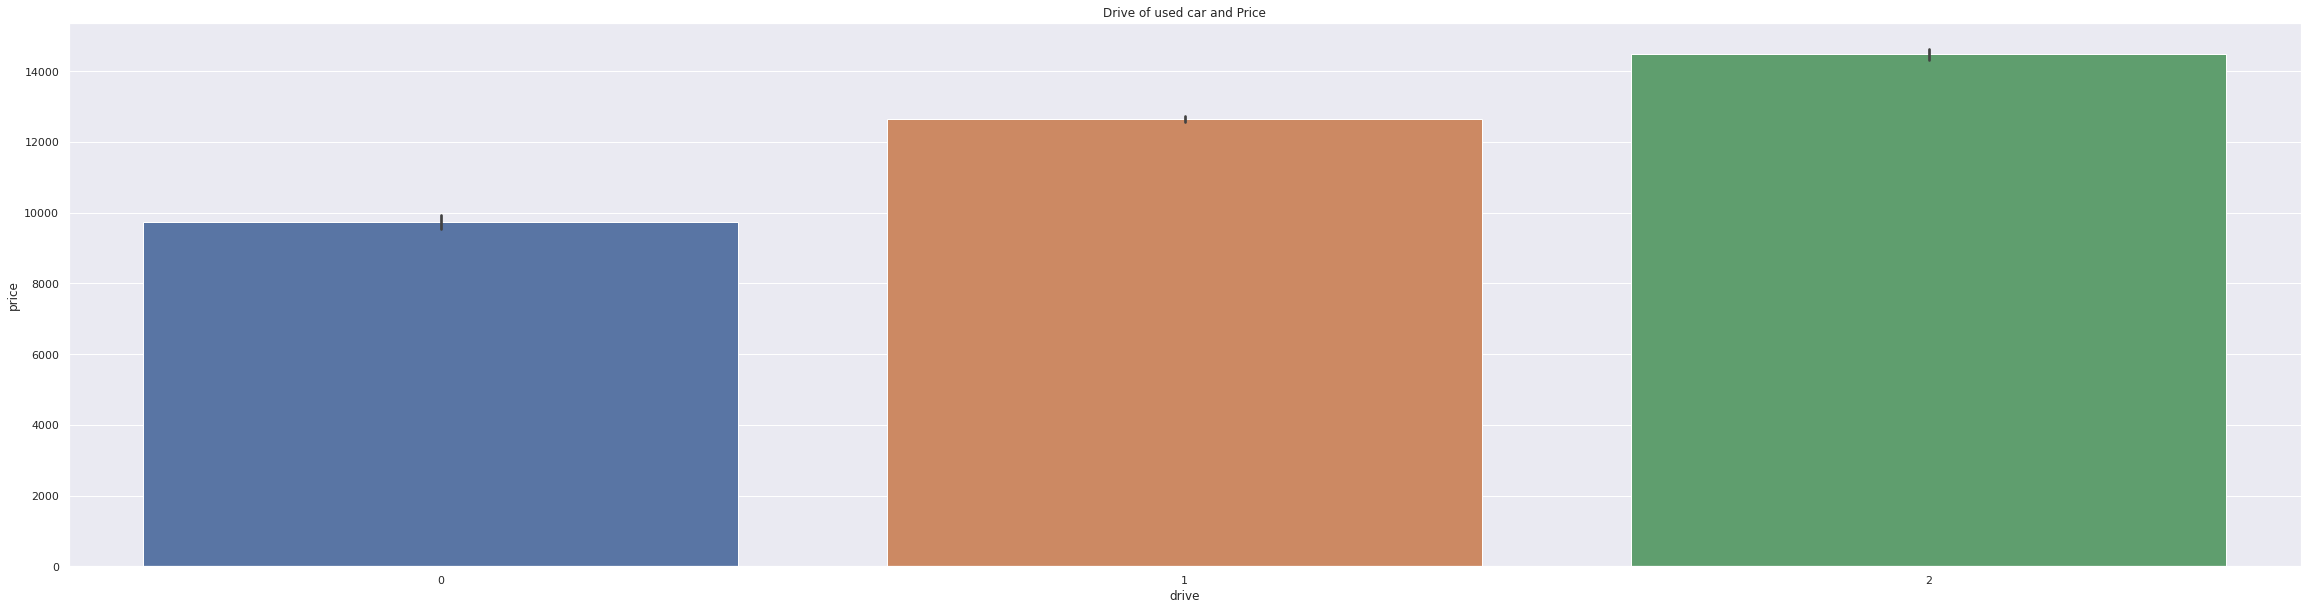

In [574]:
# Drive of used car and its influence on price
sns.barplot(data=plot_data, x='drive', y='price') ## Drive: 0-other, 1-FWD, 2-RWD ##Transmission: 0-other, 1-Automatic, 2-Manual
plt.title('Drive of used car and Price')

Text(0.5, 1.0, 'Transmission of used car and Price')

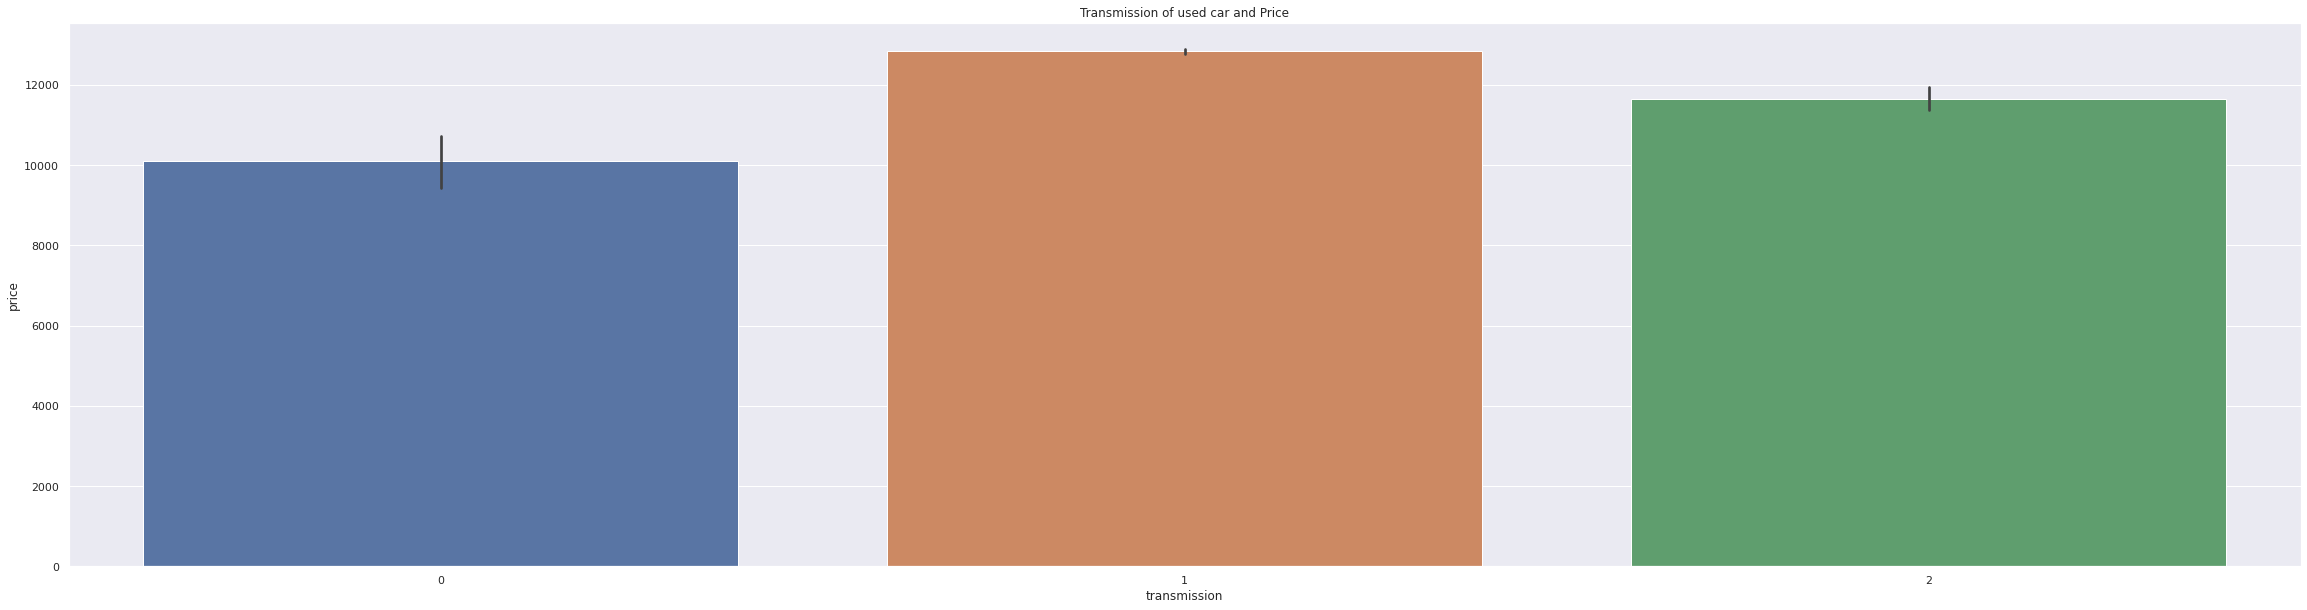

In [577]:
#Transmission of used car and its influence on price
sns.barplot(data=plot_data, x='transmission', y='price') ## Drive: 0-other, 1-FWD, 2-RWD ##Transmission: 0-other, 1-Automatic, 2-Manual
plt.title('Transmission of used car and Price')

Text(0.5, 1.0, 'Cylinders of used cars and price impact')

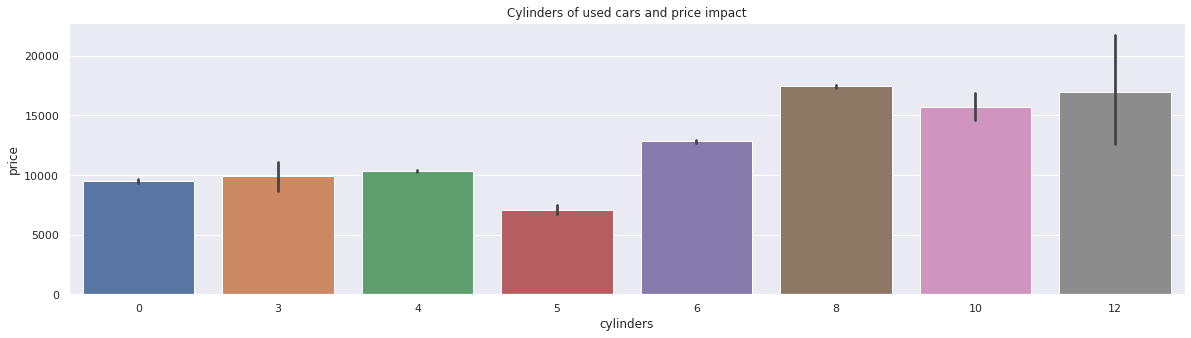

In [579]:
# Transmission of used car and its influence on price
sns.barplot(data=plot_data, x='cylinders', y='price') #0-other, 1-Automatic, 2-Manual
plt.title('Cylinders of used cars and price impact')

Text(0.5, 1.0, 'Brands of used cars and price impact')

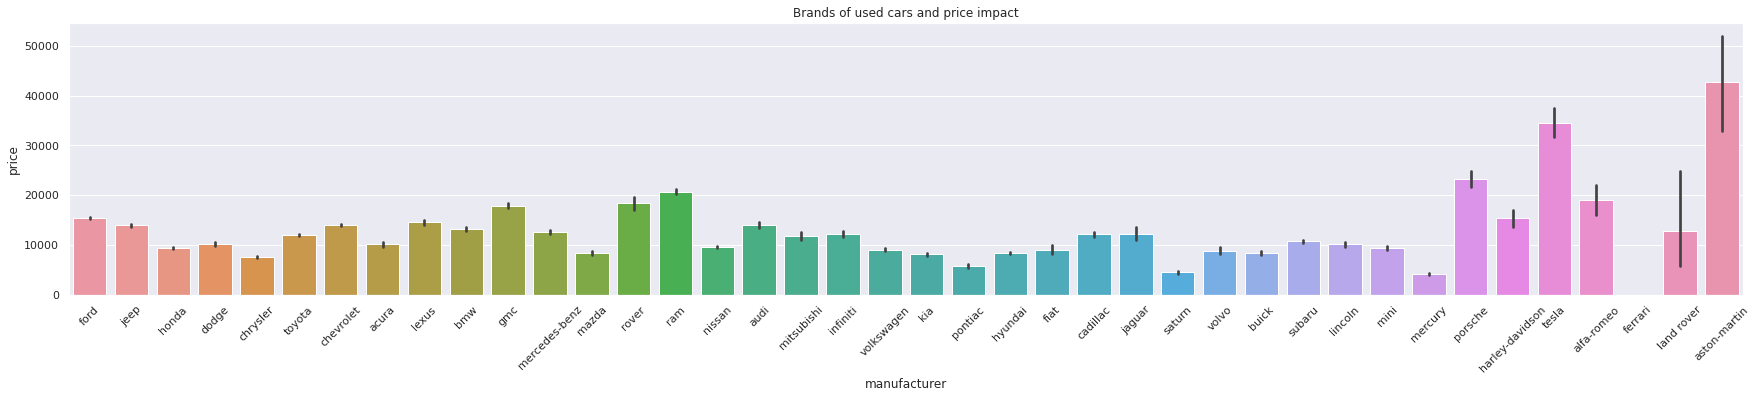

In [551]:
#Manufacturer of used cars and its impact to price
rcParams['figure.figsize'] = 30,5
sns.barplot(data=plot_data, x='manufacturer', y='price')
plt.xticks(rotation=45)
plt.title('Brands of used cars and price impact')

Text(0.5, 1.0, 'Type of used cars and price impact')

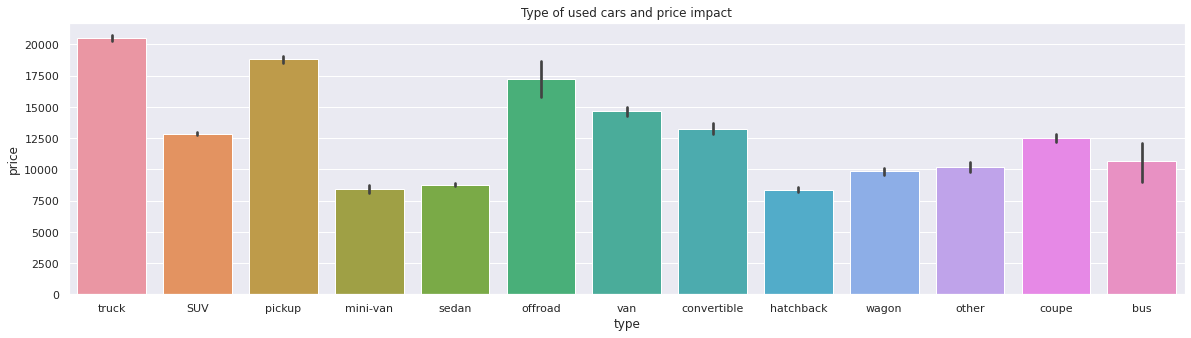

In [555]:
#Type of used cars and its impact to price
rcParams['figure.figsize'] = 20,5
sns.barplot(data=plot_data, x='type', y='price')
#plt.xticks(rotation=45)
plt.title('Type of used cars and price impact')

Text(0.5, 1.0, 'Fuel type of used cars and price impact')

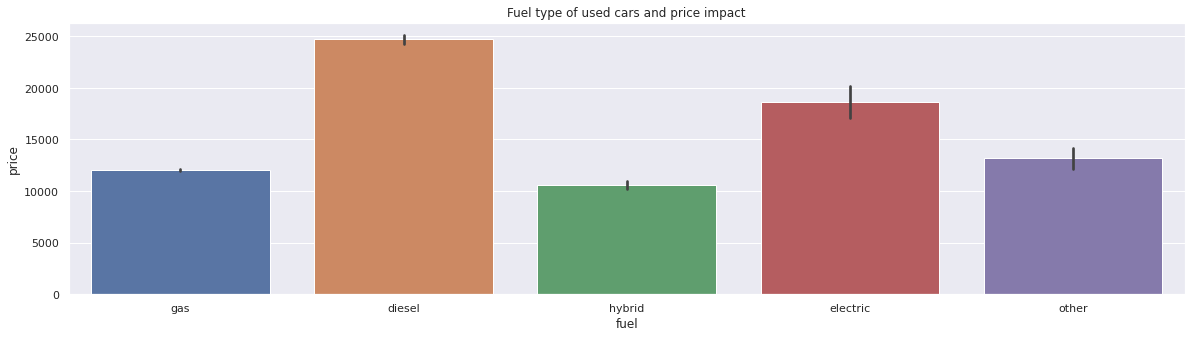

In [578]:
#Fuel type of used cars and its impact to price
rcParams['figure.figsize'] = 20,5
sns.barplot(data=plot_data, x='fuel', y='price')
#plt.xticks(rotation=45)
plt.title('Fuel type of used cars and price impact')

Text(0.5, 1.0, 'Brands and conditon of used cars type and price impact')

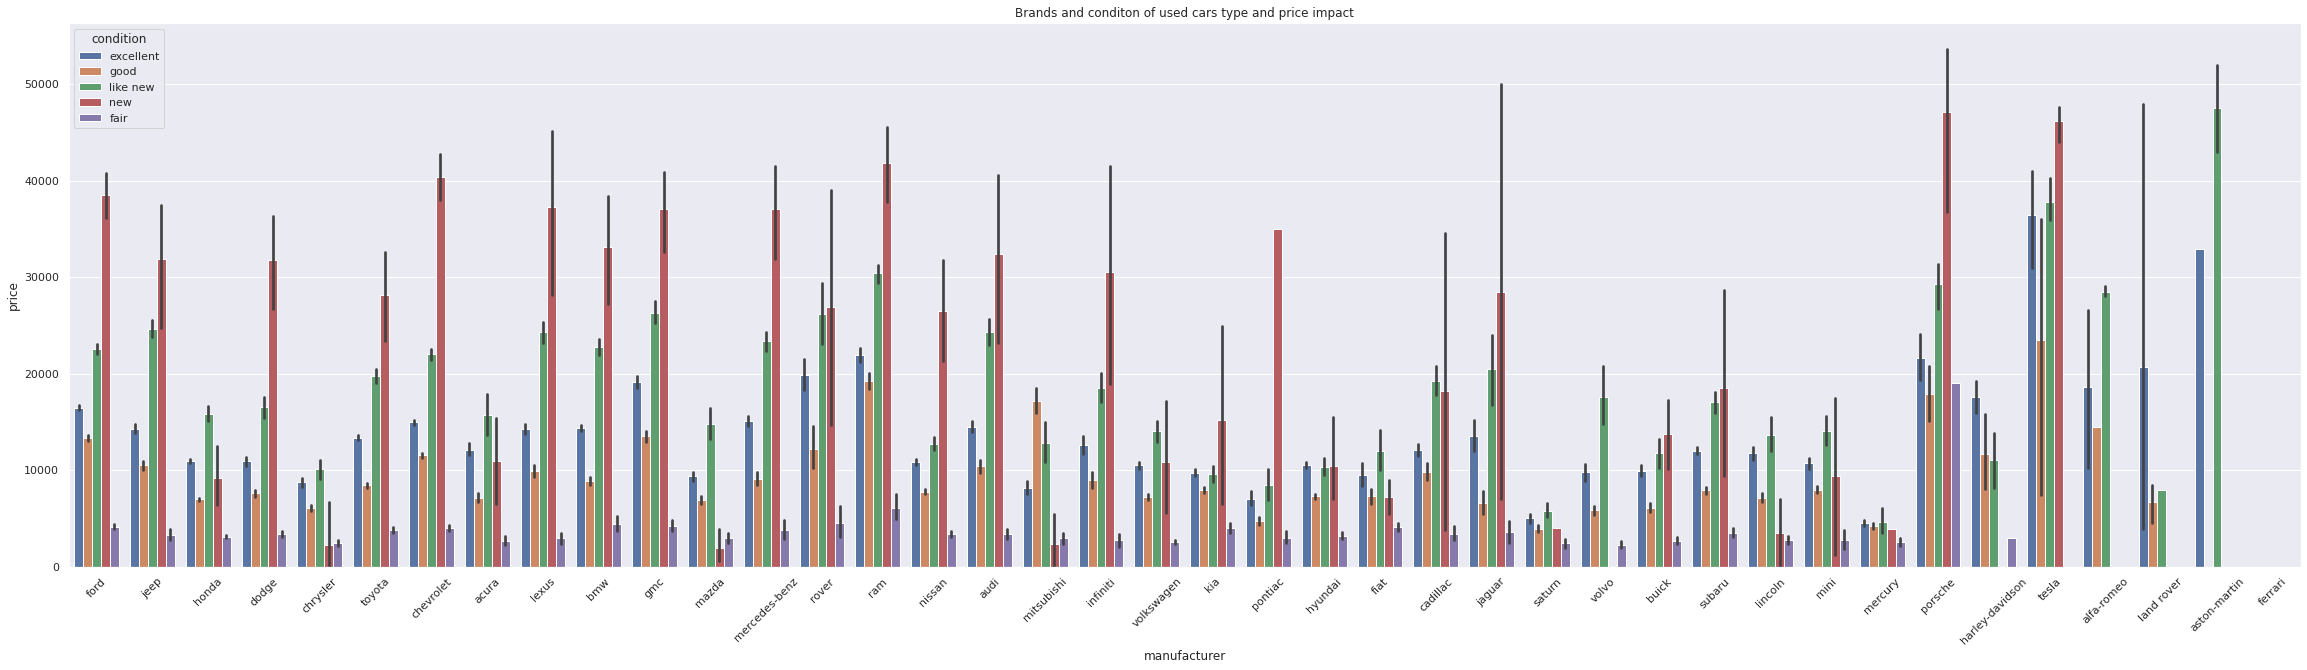

In [569]:
#Manufacturer with car type and its impact to price
rcParams['figure.figsize'] = 40,10
sns.barplot(data=plot_data.query("condition in ['excellent', 'good', 'like new', 'new', 'fair']"), x='manufacturer', y='price', hue='condition')
plt.xticks(rotation=45)
plt.title('Brands and conditon of used cars type and price impact')

In [566]:
plot_data['condition'].unique()

array(['excellent', 'good', 'like new', 'new', 'fair', 'salvage'],
      dtype=object)

In [279]:
numeric_col = ['price', 'year', 'cylinders', 'transmission', 'drive', 'odometer']
categorical_col = ['region', 'manufacturer', 'model', 'condition', 'fuel', 'title_status', 'size', 'type', 'paint_color', 'state']

In [280]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn import preprocessing
from tqdm import tqdm

In [299]:
#Converting Categorical Columns to Numerical Columns using Target Encoder
encoder_df=vehicles_no_outlier.copy()

encoder=preprocessing.LabelEncoder()

def target_encoder(data):
    noNaN = np.array(data.dropna())
    impute_ordinal = encoder.fit_transform(noNaN.reshape(-1,1))
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for i in tqdm(range(len(categorical_col))):
    target_encoder(encoder_df[categorical_col[i]])

100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


In [300]:
encoder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394325 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        394325 non-null  object 
 1   price         394325 non-null  int64  
 2   year          394325 non-null  float64
 3   manufacturer  381980 non-null  object 
 4   model         394325 non-null  object 
 5   condition     394325 non-null  object 
 6   cylinders     394325 non-null  int64  
 7   fuel          394325 non-null  object 
 8   odometer      394325 non-null  float64
 9   title_status  394325 non-null  object 
 10  transmission  394325 non-null  int64  
 11  drive         394325 non-null  int64  
 12  size          110172 non-null  object 
 13  type          394325 non-null  object 
 14  paint_color   394325 non-null  object 
 15  state         394325 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 51.1+ MB


In [301]:
#using IterativeImputer-BayesianRidge to fill missing data in Manufacturer and Size
encoder_df_fill = encoder_df[categorical_col]
encoder = preprocessing.LabelEncoder()

for i in categorical_col:
  target_encoder(encoder_df_fill[i])
  imputer = IterativeImputer(BayesianRidge())
  imputed_data = imputer.fit_transform(encoder_df_fill[i].values.reshape(-1,1))
  imputed_data = imputed_data.astype('int64')
  imputed_data = pd.DataFrame(imputed_data)
  imputed_data = encoder.inverse_transform(imputed_data.values.reshape(-1, 1))
  encoder_df_fill[i] = imputed_data
encoder_df[categorical_col] = encoder_df_fill    

In [302]:
encoder_df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [303]:
encoder_df.convert_dtypes().dtypes 

region          Int64
price           Int64
year            Int64
manufacturer    Int64
model           Int64
condition       Int64
cylinders       Int64
fuel            Int64
odometer        Int64
title_status    Int64
transmission    Int64
drive           Int64
size            Int64
type            Int64
paint_color     Int64
state           Int64
dtype: object

In [304]:
encoder_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,16,33590,2014.0,13,19995,2,8,2,57923.0,0,0,0,1,8,10,1
28,16,22590,2010.0,7,20326,2,8,2,71229.0,0,0,0,1,8,1,1
29,16,39590,2020.0,7,20373,2,8,2,19160.0,0,0,0,1,8,8,1
30,16,30990,2017.0,38,23100,2,8,2,41124.0,0,0,0,1,8,8,1
31,16,15000,2013.0,12,11438,0,6,2,128000.0,0,1,2,1,10,0,1


In [305]:
encoder_df.shape

(394325, 16)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Before we model, we need to scale price, year, model and odometer. Since we are predicting price of the used car, we will keep it lograthmic

In [376]:
encoder_df['price'] = np.log(encoder_df['price'])

In [377]:
encoder_df['year'] = StandardScaler().fit_transform(np.array(encoder_df['year']).reshape(-1,1))
encoder_df['model'] = StandardScaler().fit_transform(np.array(encoder_df['model']).reshape(-1,1))
encoder_df['odometer'] = StandardScaler().fit_transform(np.array(encoder_df['odometer']).reshape(-1,1))

In [378]:
encoder_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,16,2.343917,0.257364,13,0.977389,2,8,2,-0.552904,0,0,0,1,8,10,1
28,16,2.305108,-0.480923,7,1.026896,2,8,2,-0.331892,0,0,0,1,8,1,1
29,16,2.359564,1.364794,7,1.033926,2,8,2,-1.196755,0,0,0,1,8,8,1
30,16,2.336157,0.811079,38,1.441799,2,8,2,-0.831934,0,0,0,1,8,8,1
31,16,2.263408,0.072792,12,-0.302468,0,6,2,0.611071,0,1,2,1,10,0,1


In [379]:
encoder_df.describe()

,price,year,model,cylinders,odometer,transmission,drive
count,3.640890e+05,3.943250e+05,3.943250e+05,394325.000000,3.943250e+05,394325.000000,394325.000000
mean,-inf,-2.033195e-15,-4.640314e-16,3.417298,-2.067806e-16,0.884626,0.821234
std,NaN,1.000001e+00,1.000001e+00,3.150628,1.000001e+00,0.439536,0.631068
min,-inf,-3.249497e+00,-2.013232e+00,0.000000,-1.515002e+00,0.000000,0.000000
25%,2.185560e+00,-6.654942e-01,-7.604463e-01,0.000000,-8.641910e-01,1.000000,0.000000
50%,2.263408e+00,2.573640e-01,5.194482e-03,4.000000,-6.993665e-02,1.000000,1.000000
75%,2.322704e+00,8.110789e-01,8.981180e-01,6.000000,7.014126e-01,1.000000,1.000000
max,2.393958e+00,1.733937e+00,1.677519e+00,12.000000,3.098194e+00,2.000000,2.000000


In [380]:
#removing outliers from the target variable 'price' using IQR
first_quartile = encoder_df['price'].quantile(.25)
third_quartile = encoder_df['price'].quantile(.75)
iqr = third_quartile - first_quartile 
lower = first_quartile - 1.5*iqr
upper = third_quartile + 1.5*iqr
encoder_df_no_outlier = encoder_df.loc[(encoder_df['price']>lower) & (encoder_df['price']<upper)]

In [381]:
encoder_df_no_outlier.shape

(349631, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a854cfb10>,
      dtype=object)

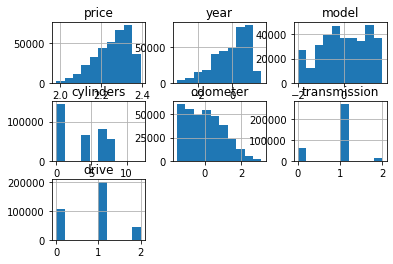

In [488]:
encoder_df_no_outlier.hist()

In [ ]:
#Since we are trying to predict the price of the used car, we will keep it as output variable

In [434]:
X = encoder_df_no_outlier.drop(columns='price', axis=1)
y = encoder_df_no_outlier['price']
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, y_test.shape)
print(type(X_train), type(y_train))

(244741, 15) (104890,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [436]:
#Setting up a function to calculate MSE, MAE, RMSE, PI, R2 Scores
from sklearn.metrics import r2_score
def model_scores (y_test, y_pred):
  scores = []
  scores.append(mean_squared_error(y_test, y_pred))
  scores.append(np.sqrt(scores[0]))
  scores.append(round(r2_score(y_test, y_pred)*100,2))
  return scores

In [437]:
#Creating a Model Results Dataframe to store model score results
#model_results = pd.DataFrame(index=['MSE', 'RMSE', 'R2']) 
model_results = []   

##### Model 1: Linear Regression

In [438]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
linreg_results = model_scores(y_test, y_pred)
print(f'LinearReg MSE: {linreg_results[0]}')
print(f'LinearReg RMSE: {linreg_results[1]}')
print(f'LinearReg R2 Score: {linreg_results[2]}')

model_results.append({'Model_name': 'Linear Regression', 'MSE': linreg_results[0], 'RMSE': linreg_results[1], 'R2 Score': linreg_results[2]})

LinearReg MSE: 0.0031826729125461403
LinearReg RMSE: 0.0564151833511701
LinearReg R2 Score: 56.31


Text(0.5, 0, 'X_train Values')

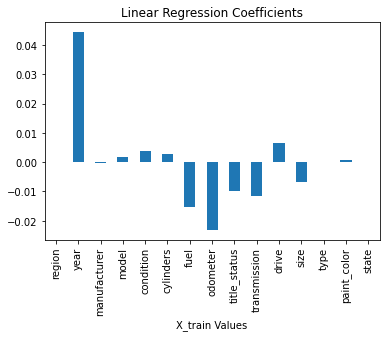

In [439]:
linreg_coeffs = pd.Series(linreg.coef_, index=X_train.columns)
linreg_coeffs.plot(kind='bar')
plt.title('Linear Regression Coefficients')
plt.xlabel('X_train Values')

##### Model 2: Ridge Grid Regression

In [440]:
param_dict = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), param_grid=param_dict, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)
y_pred1 = ridge_grid.predict(X_test)
ridge_grid_results = model_scores(y_test, y_pred1)
print(f'Ridge Grid MSE: {ridge_grid_results[0]}')
print(f'Ridge Grid RMSE: {ridge_grid_results[1]}')
print(f'Ridge Grid R2 Score: {ridge_grid_results[2]}')

ridge_best_alpha = ridge_grid.best_params_
print(f'Best alpha: {list(ridge_best_alpha.values())[0]}')

model_results.append({'Model_name': 'Ridge Regression', 'MSE': ridge_grid_results[0], 'RMSE': ridge_grid_results[1], 'R2 Score': ridge_grid_results[2]})

Ridge Grid MSE: 0.003182672095010987
Ridge Grid RMSE: 0.05641517610546817
Ridge Grid R2 Score: 56.31
Best alpha: 10.0


Text(0.5, 0, 'X_train Values')

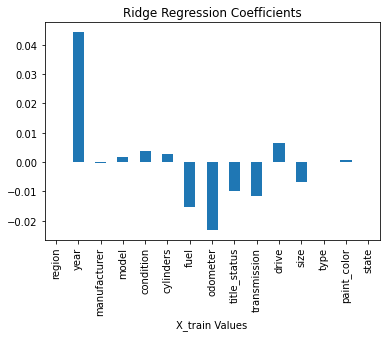

In [441]:
ridgereg = Ridge(alpha=10.0).fit(X_train, y_train)
ridgereg_coeffs = pd.Series(ridgereg.coef_, index=X_train.columns)
ridgereg_coeffs.plot(kind='bar')
plt.title('Ridge Regression Coefficients')
plt.xlabel('X_train Values')

##### Model 3: LASSO Grid Regression

In [442]:
param_dict = {'alpha': [0.001, 0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), param_grid=param_dict, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
y_pred2 = lasso_grid.predict(X_test)
lasso_grid_results = model_scores(y_test, y_pred2)
print(f'Lasso Grid MSE: {lasso_grid_results[0]}')
print(f'Lasso Grid RMSE: {lasso_grid_results[1]}')
print(f'Lasso Grid R2 Score: {lasso_grid_results[2]}')

lasso_best_alpha = lasso_grid.best_params_
print(f'Best alpha: {list(lasso_best_alpha.values())[0]}')

model_results.append({'Model_name': 'Lasso Regression', 'MSE': lasso_grid_results[0], 'RMSE': lasso_grid_results[1], 'R2 Score': lasso_grid_results[2]})

Lasso Grid MSE: 0.0032034992993743906
Lasso Grid RMSE: 0.05659946377285204
Lasso Grid R2 Score: 56.02
Best alpha: 0.001


Text(0.5, 0, 'X_train Values')

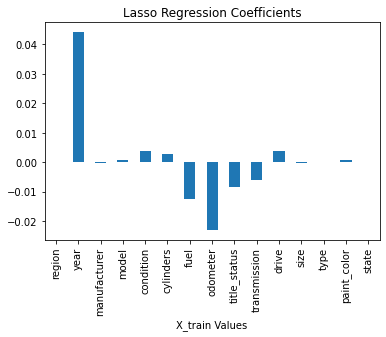

In [443]:
lassoreg = Lasso(alpha=0.001).fit(X_train, y_train)
lassoreg_coeffs = pd.Series(lassoreg.coef_, index=X_train.columns)
lassoreg_coeffs.plot(kind='bar')
plt.title('Lasso Regression Coefficients')
plt.xlabel('X_train Values')

##### Model 4: KNN Model

In [444]:
#Identifying MSE to choose n_neighbors
from sklearn.neighbors import KNeighborsRegressor

mses=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    results=np.sqrt(mean_squared_error(y_test, y_pred))
    mses.append(results)
print(mses)

[0.06295649686828068, 0.0579194519672858, 0.057154878619216365, 0.057250231496807, 0.05760111888914045, 0.05803992102059601, 0.05845064146645705, 0.05889833626745725, 0.05933850195346198]


In [445]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(X_train,y_train)
y_pred3=KNN.predict(X_test)
KNN_results = model_scores(y_test, y_pred3)
print(f'KNN MSE: {KNN_results[0]}')
print(f'KNN RMSE: {KNN_results[1]}')
print(f'KNN R2 Score: {KNN_results[2]}')

model_results.append({'Model_name': 'KNN Regression', 'MSE': KNN_results[0], 'RMSE': KNN_results[1], 'R2 Score': KNN_results[2]})

KNN MSE: 0.0033546629161907266
KNN RMSE: 0.0579194519672858
KNN R2 Score: 53.95


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [447]:
results = pd.DataFrame(model_results)
results

,Model_name,MSE,RMSE,R2 Score
0,Linear Regression,0.003183,0.056415,56.31
1,Ridge Regression,0.003183,0.056415,56.31
2,Lasso Regression,0.003203,0.056599,56.02
3,KNN Regression,0.003355,0.057919,53.95


In [472]:
px.line(data_frame=results, x='Model_name', y='R2 Score', title='Model Performance and Accuracy')

In [485]:
# Both Linear Regression and Ridge Regression performed well with lower MSEs and RMSEs with a high R2 Score.
# Year has the highest feature importance in all the models and influences the price of the used car

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.